<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen1_Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 1

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

Fecha: _ de 2024

# Ejercicio 1

## Datos

Considere el conjunto de datos “data1” del fichero data_exam1.xls

### Puntos

1. Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la
respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

2. Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind. ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con
interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [8]:
url = 'https://github.com/cam2149/MachinelearningI/raw/85795f6469ebde1f693b7cb6c893c10135408974/data_exam1.xlsx'

df=pd.read_excel(url, sheet_name='data1')

In [9]:
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [11]:
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


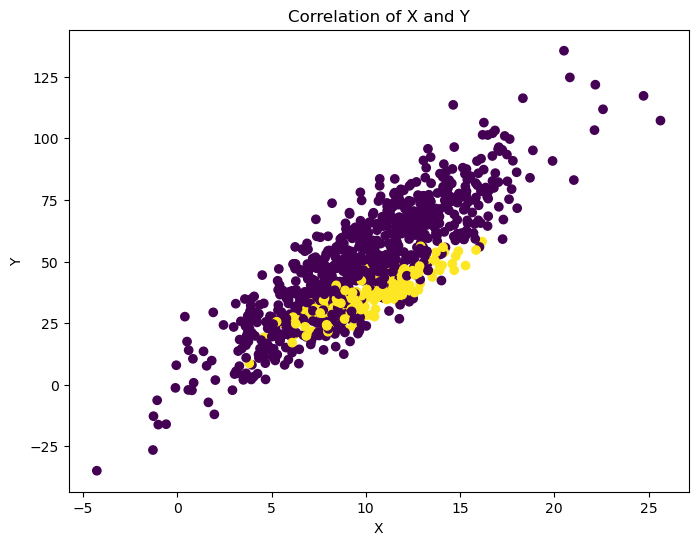

In [12]:
# @title Correlation of X and Y

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['Ind'], cmap='viridis')
plt.title('Correlation of X and Y')
plt.xlabel('X')
_ = plt.ylabel('Y')

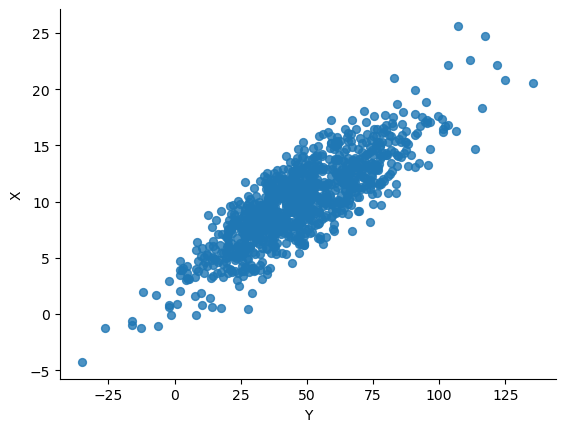

In [13]:
# @title Y vs X

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Y', y='X', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

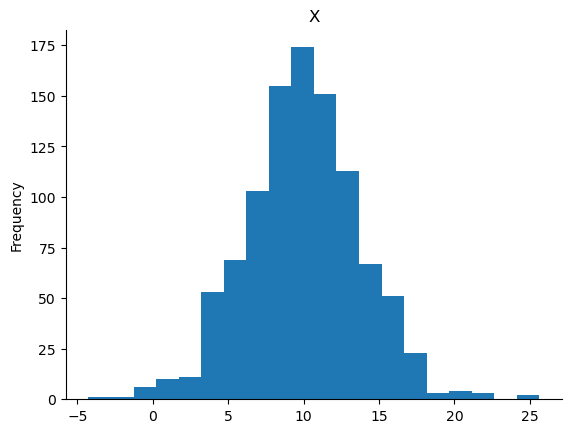

In [14]:
# @title X

from matplotlib import pyplot as plt
df['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

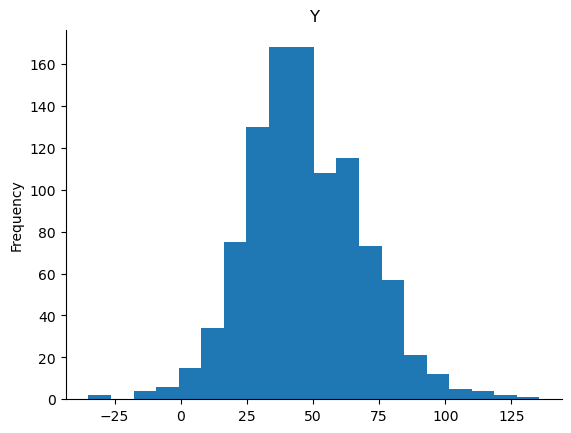

In [15]:
# @title Y

from matplotlib import pyplot as plt
df['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

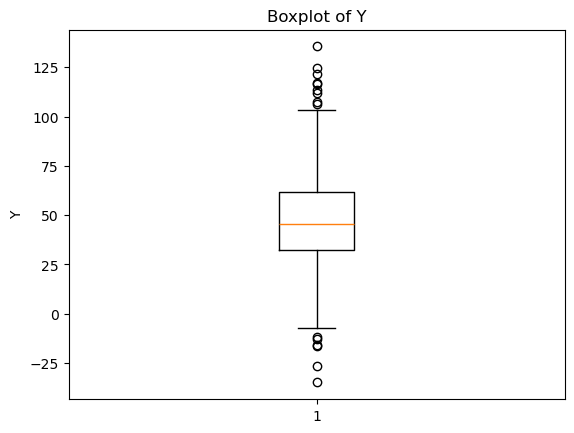

In [16]:
plt.boxplot(df['Y'])
plt.title('Boxplot of Y')
plt.ylabel('Y')
plt.show()


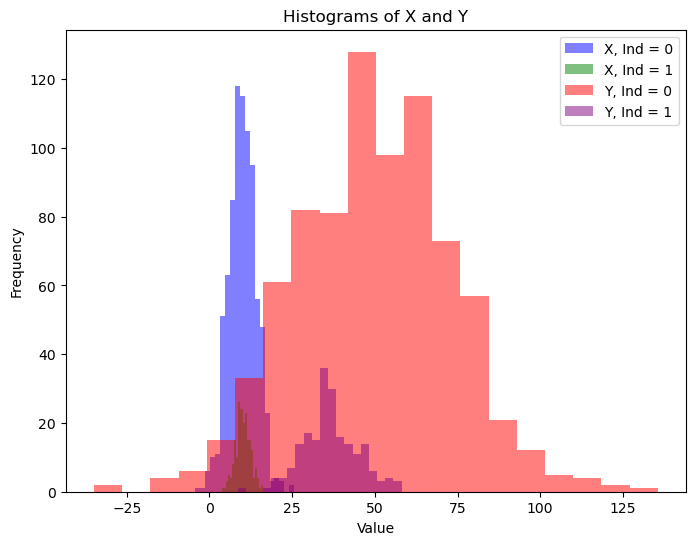

In [17]:
# @title Histograms of X and Y

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df[df['Ind'] == 0]['X'], bins=20, alpha=0.5, label='X, Ind = 0', color='blue')
plt.hist(df[df['Ind'] == 1]['X'], bins=20, alpha=0.5, label='X, Ind = 1', color='green')
plt.hist(df[df['Ind'] == 0]['Y'], bins=20, alpha=0.5, label='Y, Ind = 0', color='red')
plt.hist(df[df['Ind'] == 1]['Y'], bins=20, alpha=0.5, label='Y, Ind = 1', color='purple')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of X and Y')
_ = plt.legend()

# Ejercicio 2

## Datos

**data2** del fichero **data_exam.xlsx**

## Puntos

- De acuerdo al analisis del item anterior proponer una transformación para alguna variable y justificar
- Proponer un modelo lineal, iterpretar y validar supuestos

# Ejercicio 3

## Datos

**Wine Quality** del fichero **datos.xlsx**

**Y**= Densidad

**Eliminar:**

- PH
- Sulfatos
- Cloruros
- Acidez Volátil
- Acidez Fija
- Calidad de Vino

## Puntos

1. Estandarizar variables y calcular matrices de correlación de **Pearson**, **Kendall** y **Spearman**. ¿Qué diferencia hay entre las dependencias obtenidas?
2. Realizar particios de datos 80-20.
  - Construir 3 modelos RLM.
  - Comparar e interpretar los valores de los coeficientes de regresión en cada método.
3. ¿Cuál de los modelos propuestos predice mejor?
  - Realizar una predicción con los datos de prueba.
  - Calcular el RMSE.
4. Validar supuesto teóricos de cada modelo.
5. Realizar un diagrama de dispersión del conjunto de datos.
  - ¿Se evidencia comportamientos lineales?
  - Si no son lineales realizar transformaciones de varaibles y justificar.
  - Generar un modelo RLM e interpretar.

In [18]:
# Get Excel file from GitHub
url = 'https://github.com/cam2149/MachinelearningI/blob/main/datos.xls?raw=true'
# Read the sheet 'Wine Quality' into a DataFrame df ignoring the first 2 rows
df = pd.read_excel(url, sheet_name='Wine Quality', skiprows=2)

In [19]:
# Visualize the first 5 rows of the DataFrame
df.head()

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [20]:
# Remove columns pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija, and Calidad del Vino
df.drop(columns=['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino'], inplace=True)

# Visualize the first 5 rows of the DataFrame
df.head()

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,0.36,20.7,45.0,170.0,1.0010,8.8
1,0.34,1.6,14.0,132.0,0.9940,9.5
2,0.40,6.9,30.0,97.0,0.9951,10.1
3,0.32,8.5,47.0,186.0,0.9956,9.9
4,0.32,8.5,47.0,186.0,0.9956,9.9


In [22]:
# Define Densidad as the target variable (Y) and the rest of the columns as the features (X)
x = df.drop(columns='Densidad')
y = df['Densidad']

In [25]:
# Standardize the features


scaler = StandardScaler()
x = scaler.fit_transform(x)

# Describe the features
pd.DataFrame(x).describe()

,0,1,2,3,4
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,5.802717e-17,-1.066249e-16,-1.015476e-17,-4.642174e-17,-3.713739e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-2.761743e+00,-1.141944e+00,-1.958677e+00,-3.044230e+00,-2.043297e+00
25%,-5.304757e-01,-9.250474e-01,-7.237750e-01,-7.144739e-01,-8.242757e-01
50%,-1.172780e-01,-2.349217e-01,-7.692173e-02,-1.026189e-01,-9.286267e-02
75%,4.611988e-01,6.918185e-01,6.287364e-01,6.739664e-01,7.198184e-01
max,1.095642e+01,1.171411e+01,1.491831e+01,7.098444e+00,2.995326e+00


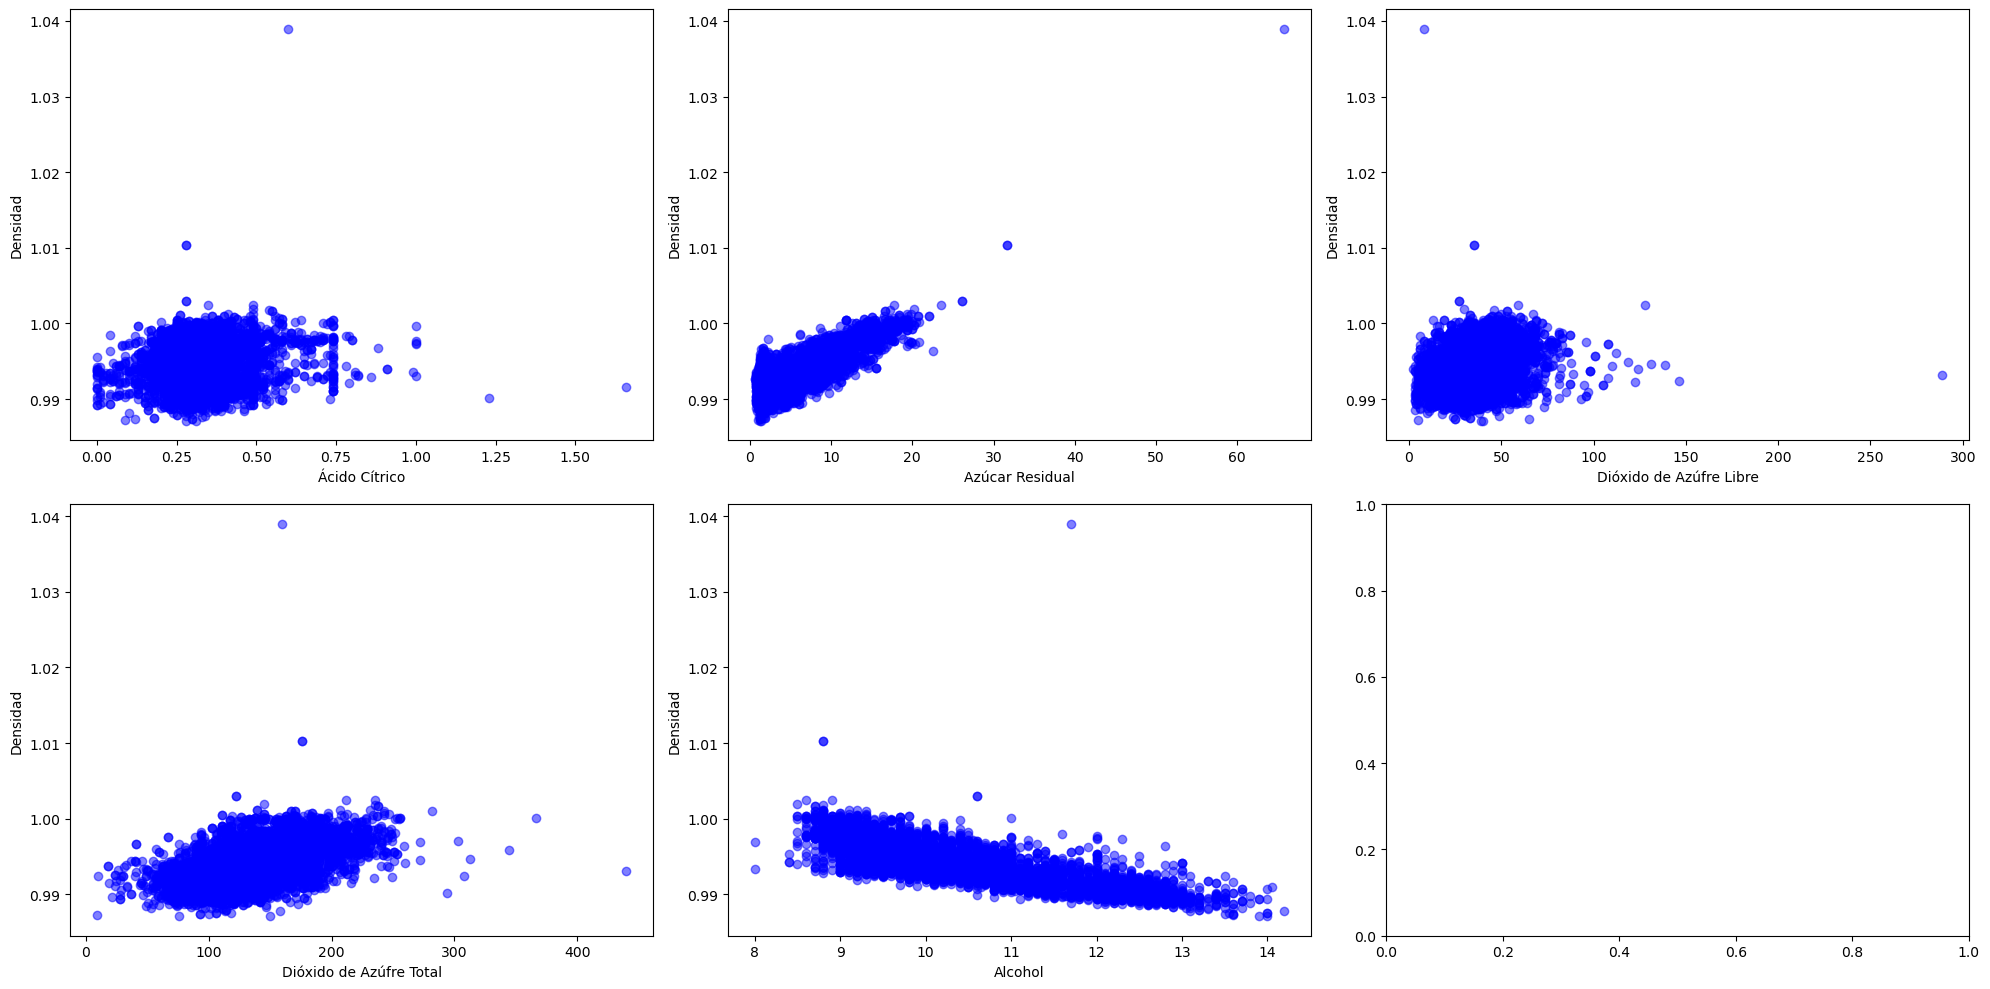

In [24]:
# Plot the scatter charts of the features against the target variable
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, feature in enumerate(x.columns):
    axs[i // 3, i % 3].scatter(x[feature], y, c='blue', alpha=0.5)
    axs[i // 3, i % 3].set_xlabel(feature)
    axs[i // 3, i % 3].set_ylabel('Densidad')
plt.tight_layout()
plt.show()




# Ejercicio 4

## Datos

**publicidad.csv**

## Puntos

1. Graficar el retorno de la inversión **Sales** vs **TV, Radio, Newspaper**.
  - Usar scatter_matrix()
  - Interpretar graficos de las variables 2 a 2.
2. Calcular coeficiente de correlación.
  - Graficar mapa de calor de las correlaciones.
  - Interpretar las estructuras de dependencia encontradas.
3. Escoger una de las 3 variables para modelar las ventas.
  - Ajustar modelo de regresión lineal simple y encontrar la ecuación de la recta
  - ¿Cuál es el valor del coeficiente de determinación ${𝑅}^2$.
  - ¿Cómo se interpreta este valor?
4. Realizar una predicción del retorno a la inversión al realizar 5 anuncios.
  - ¿Cuál es el intervalo de confianza del 95% para la predicción?